In [1]:
%matplotlib inline

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from plotting import plot_equatorial_pacific, get_dataframe

# Study of the Effects of ENSO on Tropical Depressions in the North Pacific Ocean

## ABSTRACT

The El Niño-Southern Oscillation (ENSO) is a critical driver of climate variability, with profound impacts on weather patterns across the globe, particularly in the North Pacific Ocean. This study investigates the influence of ENSO phases—El Niño, La Niña, and Neutral on the formation, frequency, intensity, and tracks of tropical depressions (TD) in the North Pacific Ocean. Utilizing historical sea surface temperature (SST) data and tropical depression records, the study employs statistical analysis and geospatial techniques to explore correlations between ENSO phases and tropical depression activity.

The analysis reveals significant variations in the frequency and intensity of tropical depressions across different ENSO phases, with El Niño years showing a higher frequency of intense tropical depressions in the Central and Eastern Pacific, while La Niña years are associated with a westward shift in tropical depression activity towards the Western Pacific. The study also examines the changes in SST anomalies during different ENSO phases and their relationship with tropical depression formation.

These findings provide a deeper understanding of the complex interactions between ENSO and tropical depression dynamics in the North Pacific, offering valuable insights for improving the prediction and management of tropical depressions in the context of ENSO-driven climate variability. The results have significant implications for forecasting, disaster preparedness, and climate adaptation strategies in regions affected by tropical depressions.

### Introduction

The El Niño–Southern Oscillation is a single climate phenomenon that periodically fluctuates between three phases: Neutral, La Niña or El Niño. La Niña and El Niño are opposite phases in the oscillation which are deemed to occur when specific ocean and atmospheric conditions are reached or exceeded.

**El Niño** is the phase where the ocean waters in the central and eastern Pacific become warmer than usual. This warming can cause significant changes in weather patterns, such as increased rainfall in some areas and droughts in others.

**La Niña** is the opposite phase, where the ocean waters in these regions become cooler than average. This cooling also disrupts typical weather patterns, often leading to different sets of extremes, like more intense storms or colder temperatures in certain areas.

**Neutral** refers to the periods between El Niño and La Niña when sea surface temperatures are closer to their average, and global weather patterns are generally more stable.

ENSO is one of the most important drivers of climate variability on Earth, affecting everything from rainfall and temperatures to the occurrence of natural disasters like floods, droughts, and storms. Information on the phases and temperature deviations can be found in the [NOAA](https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php) website.  Warm and cold periods are calculated based on a threshold of $\pm0.5^oC $ for the Oceanic Niño Index (ONI) in the area of $5^oN-5^oS, 170^oW-120^oW$ (red rectangle).
On average, the period starts July-August and peaks November-January. 

Below diagrams showing the **SST** (sea surface temperature) of the ocean during peak of ENSO. The data is obtained from [NASA Earth Data](https://www.earthdata.nasa.gov/topics/ocean/ocean-temperature/sea-surface-temperature) website.

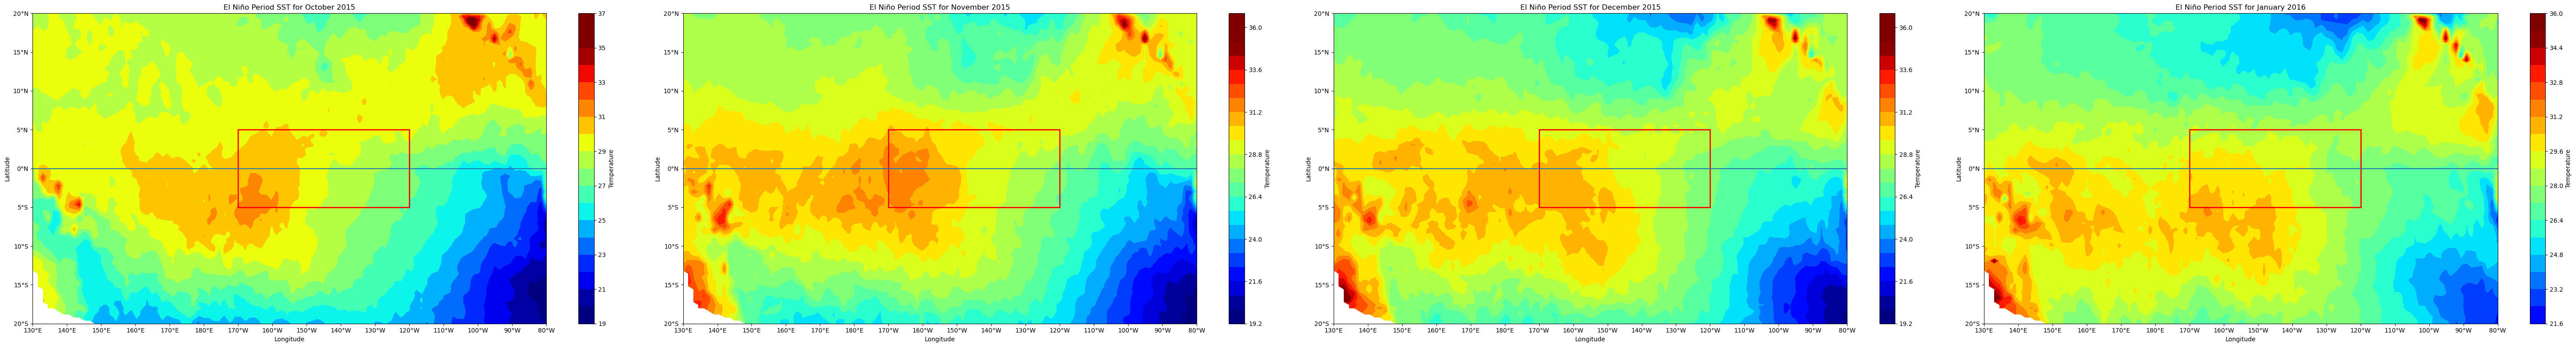

In [7]:
plot_equatorial_pacific(path='data/csv_ready/elnino_2015.csv', cond_name='El Niño Period', vmin=20, vmax=35)

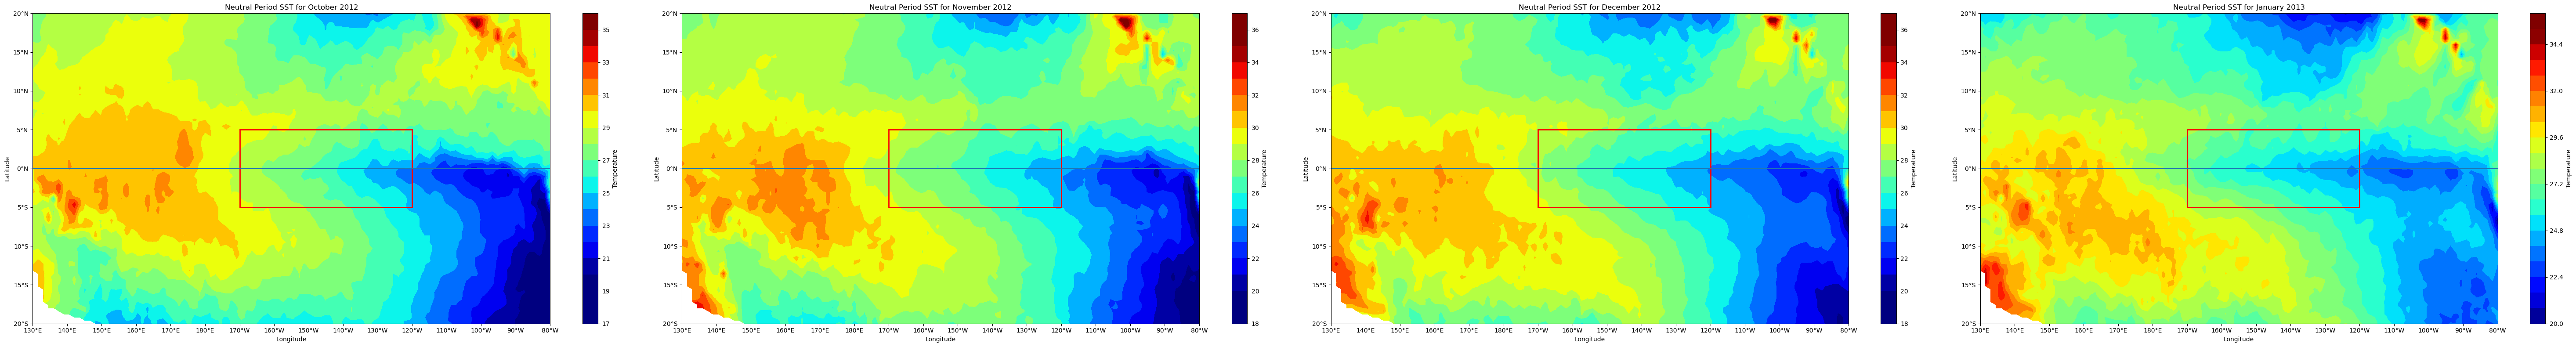

In [9]:
plot_equatorial_pacific('data/csv_ready/neutral_2012.csv', 'Neutral Period', vmin=20, vmax=35)

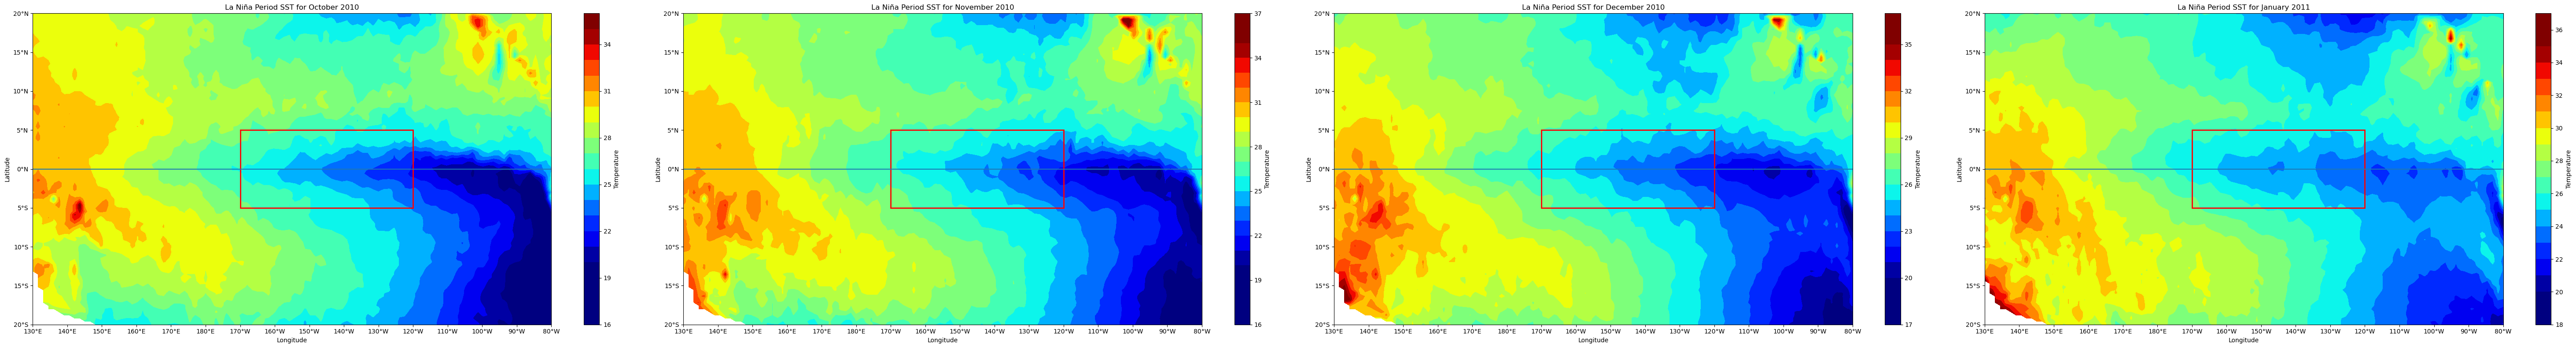

In [8]:
plot_equatorial_pacific('data/csv_ready/lanina_2010.csv', 'La Niña Period', vmin=20, vmax=35)

Below is a plot to compare the mean temperature of the **El Niño Region**, shown as red rectangle in the heatmaps.

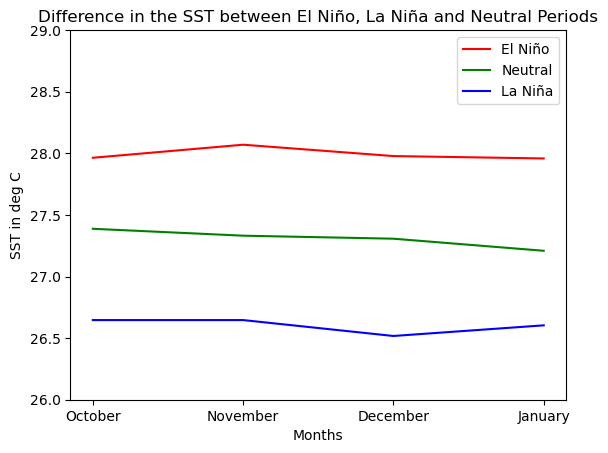

In [55]:
la_nina = get_dataframe('data/csv_ready/lanina_2010.csv')
neutral = get_dataframe('data/csv_ready/neutral_2012.csv')
el_nino = get_dataframe('data/csv_ready/elnino_2015.csv')

dataframes = [el_nino, neutral, la_nina]
colors = ['r', 'g', 'b']
x = ['October', 'November', 'December', 'January']
labels = ['El Niño', 'Neutral', 'La Niña']
for i, df in enumerate(dataframes):
    sst = df.groupby(df.index).sst.mean()
    plt.plot(x, sst, c=colors[i], label=labels[i])

plt.ylim(26, 29)

plt.legend()
plt.xlabel('Months')
plt.ylabel('SST in deg C')
plt.title('Difference in the SST between El Niño, La Niña and Neutral Periods')
plt.show()

### Tropical depressions (TD)

This project focuses on understanding how ENSO affects TDs in the North Pacific Ocean. TDs are low-pressure weather systems that can develop into more severe storms, such as tropical storms or hurricanes. By analyzing historical data on sea surface temperatures (SSTs) and TDs, this study aims to uncover patterns and relationships between the different phases of ENSO and the behavior of TDs in the Eastern, Central, and Western Pacific regions. Understanding these connections can help improve forecasts and prepare for the impacts of these powerful weather systems.

The season of the TDs in **Eastern and Central North Pacific** officially begins in mid-May (Eastern Pacific) or June 1st (Central Pacific) and ends on November 30th, with peak activity typically occurring from August to September. In **Western North Pacific**, unlike the Eastern and Central Pacific, has TDs occurring throughout the year. However, the most active period is from July to October, with a significant concentration of storms.

ENSO peaks in December and the conditions typically take several months to influence global weather patterns fully. Then the primary effects on tropical storms and depressions in the North Pacific would generally be observed during the summer and fall of the year to follow. Basis on the above assumption, the period of ENSO will be applied to the years from 1950 till now. The value of the ENSO column of the table below will reflect the ENSO year phase. 1 - El Niño influenced year, 0 -Neutral year, -1 - La Niña influenced year. The phases are depending on whether ONI is greater than 0.5, less than -0.5, or between -0.5 and 0.5.

### Establishing Hypotheses
**Hypothesis 1**: ENSO and Frequency of Tropical Depressions

- Null Hypothesis $H_0$: There is **no significant difference** in the frequency of tropical depressions across different ENSO phases (El Niño, La Niña, Neutral).
- Alternative Hypothesis $H_1$: There **is a significant difference** in the frequency of tropical depressions across different ENSO phases.

**Hypothesis 2**: ENSO and Intensity of Tropical Depressions

- Null Hypothesis $H_0$: ENSO phases **do not** significantly affect the intensity of tropical depressions (measured by metrics such as maximum wind speed or minimum central pressure).
- Alternative Hypothesis $H_1$: ENSO phases significantly affect the intensity of tropical depressions.

**Hypothesis 3**: ENSO and Tropical Depressions tracks

- Null Hypothesis $H_0$: ENSO phases **do not** significantly affect the track of tropical depressions.
- Alternative Hypothesis $H_1$: ENSO phases significantly affect the track of tropical depressions.

The hypotheses will be applied for TDs in NW, Central and NE Pacific Ocean

#### Exploratory Data Analysis (EDA)
In the context of studying the effects of ENSO on TDs in the North Pacific Ocean, EDA will involve temporal, geospatial, and intensity analysis.

**Temporal Analysis** will be used to understand how the frequency of TDs varies over time and how this is influenced by different ENSO phases. Additionally, this analysis will explore how sea surface temperature (SST) anomalies correlate with these variations. We start by calculating the frequency of a TD per calendar year. Frequency values are calculated by counting the number of occurrences of tropical depressions within a specific time frame, such as annually. It will help to quantify how active a particular year or ENSO phase was in terms of tropical depression formation.

The JMA TD dataset, related to the TDs in the NW Pacific:
```python
jma = pd.read_csv('data/csv_ready/jma_td.csv', index_col=0)
jma.index = pd.to_datetime(jma.index)
```
ONI table:
```python
oni_table = pd.read_csv('data/csv_ready/oni_table.csv', index_col=0)
oni_table.index = pd.to_datetime(oni_table.index)
```
Calculating the frequency for every year:
```python
frequency = jma.groupby(jma.index.year)['name'].nunique()
```
Exporting the ENSO phase:
```python
enso_phase = oni_table.groupby(oni_table.index.year)['enso'].apply(lambda x: x.unique()[0])
```
Finally, merging the frequency and the phase into one dataframe:
```python
df_merged = pd.merge(frequency, enso_phase, on='date')
df_merged.columns = ['frequency', 'enso']
```

In [154]:
jma = pd.read_csv('data/csv_ready/jma_td.csv', index_col=0)
jma.index = pd.to_datetime(jma.index)
oni_table = pd.read_csv('data/csv_ready/oni_table.csv', index_col=0)
oni_table.index = pd.to_datetime(oni_table.index)
frequency = jma.groupby(jma.index.year)['name'].nunique()
enso_phase = oni_table.groupby(oni_table.index.year)['enso'].apply(lambda x: x.unique()[0])
df_merged = pd.merge(frequency, enso_phase, on='date')
df_merged.columns = ['frequency', 'enso']

In [180]:
pd.read_csv('data/csv_ready/ne_pacific_td.csv')

,date,basin,name,consecutive_count,type_of_depression,lat,lon,max_wind_kn,min_pressure_mBar
0,1949-06-17 12:00:00,EP,UNNAMED,25,TS,14.1,253.0,45.0,-999.0
1,1949-06-17 18:00:00,EP,UNNAMED,25,TS,14.6,252.3,45.0,-999.0
2,1949-06-18 00:00:00,EP,UNNAMED,25,TS,15.0,251.6,45.0,-999.0
3,1949-06-18 06:00:00,EP,UNNAMED,25,TS,15.4,250.8,45.0,-999.0
4,1949-06-18 12:00:00,EP,UNNAMED,25,TS,15.7,250.0,45.0,-999.0
...,...,...,...,...,...,...,...,...,...
31168,2023-11-26 12:00:00,EP,RAMON,25,LO,14.4,236.3,30.0,1006.0
31169,2023-11-26 18:00:00,EP,RAMON,25,LO,14.3,236.0,25.0,1008.0
31170,2023-11-27 00:00:00,EP,RAMON,25,LO,14.1,235.6,25.0,1008.0
31171,2023-11-27 06:00:00,EP,RAMON,25,LO,13.8,235.3,25.0,1008.0


Once we have that datafreme, we can then plot the frequency against the ENSO phase on a color bar plot:

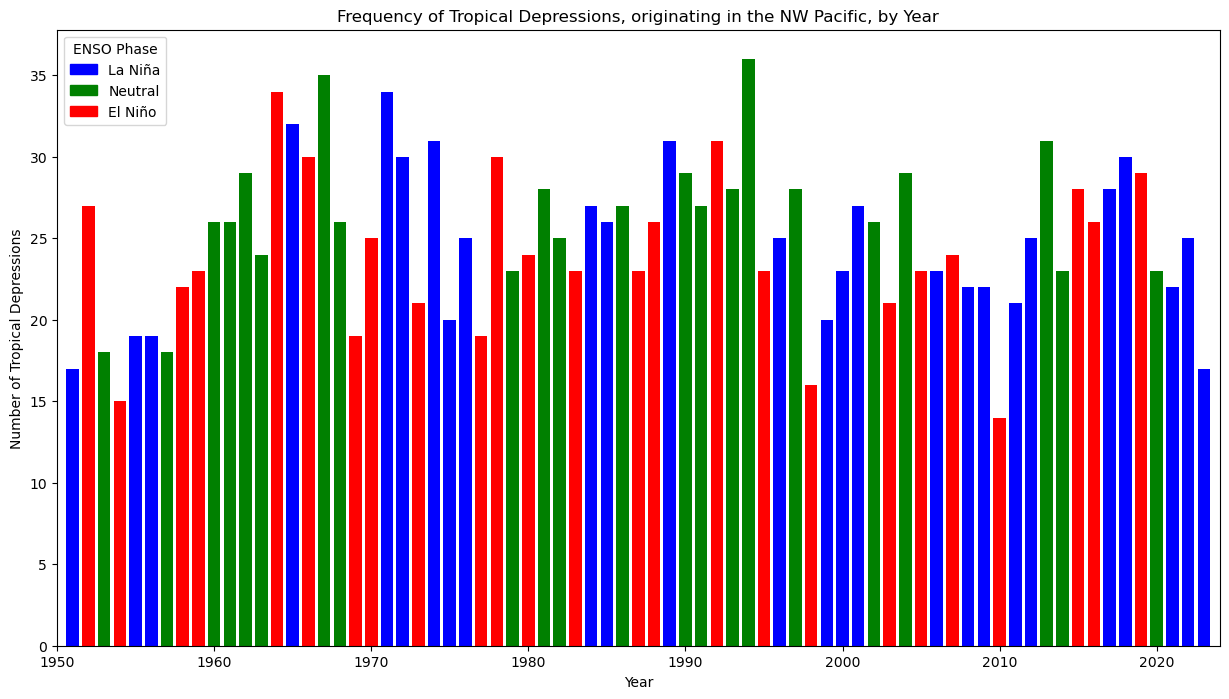

In [179]:
colors = {-1: 'blue', 0: 'green', 1: 'red'}

plt.figure(figsize=(15, 8))
for year, freq, enso in zip(df_merged.index, df_merged.frequency, df_merged.enso):
    plt.bar(year, freq, color=colors[enso])

plt.xlim(1950, 2024)

plt.xlabel('Year')
plt.ylabel('Number of Tropical Depressions')

handles = [plt.Rectangle((0,0),1,1, color=colors[enso]) for enso in colors]
labels = ['La Niña', 'Neutral', 'El Niño']
plt.legend(handles, labels, title='ENSO Phase', loc='upper left')

plt.title('Frequency of Tropical Depressions, originating in the NW Pacific, by Year')
plt.show()